### Business case: To find out based on given features the loan is approved or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('loan_approved.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Basic checks

In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [8]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

## EDA

In [12]:
pip install sweetviz

In [13]:
## used for univariate analysis

import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
## Discrete/categorical columns

data1 = data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term','Credit_History']]

## Numerical columns

data2 = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [15]:
data.rename({'Loan_Status (Approved)':'Loan_status'},axis=1,inplace=True)

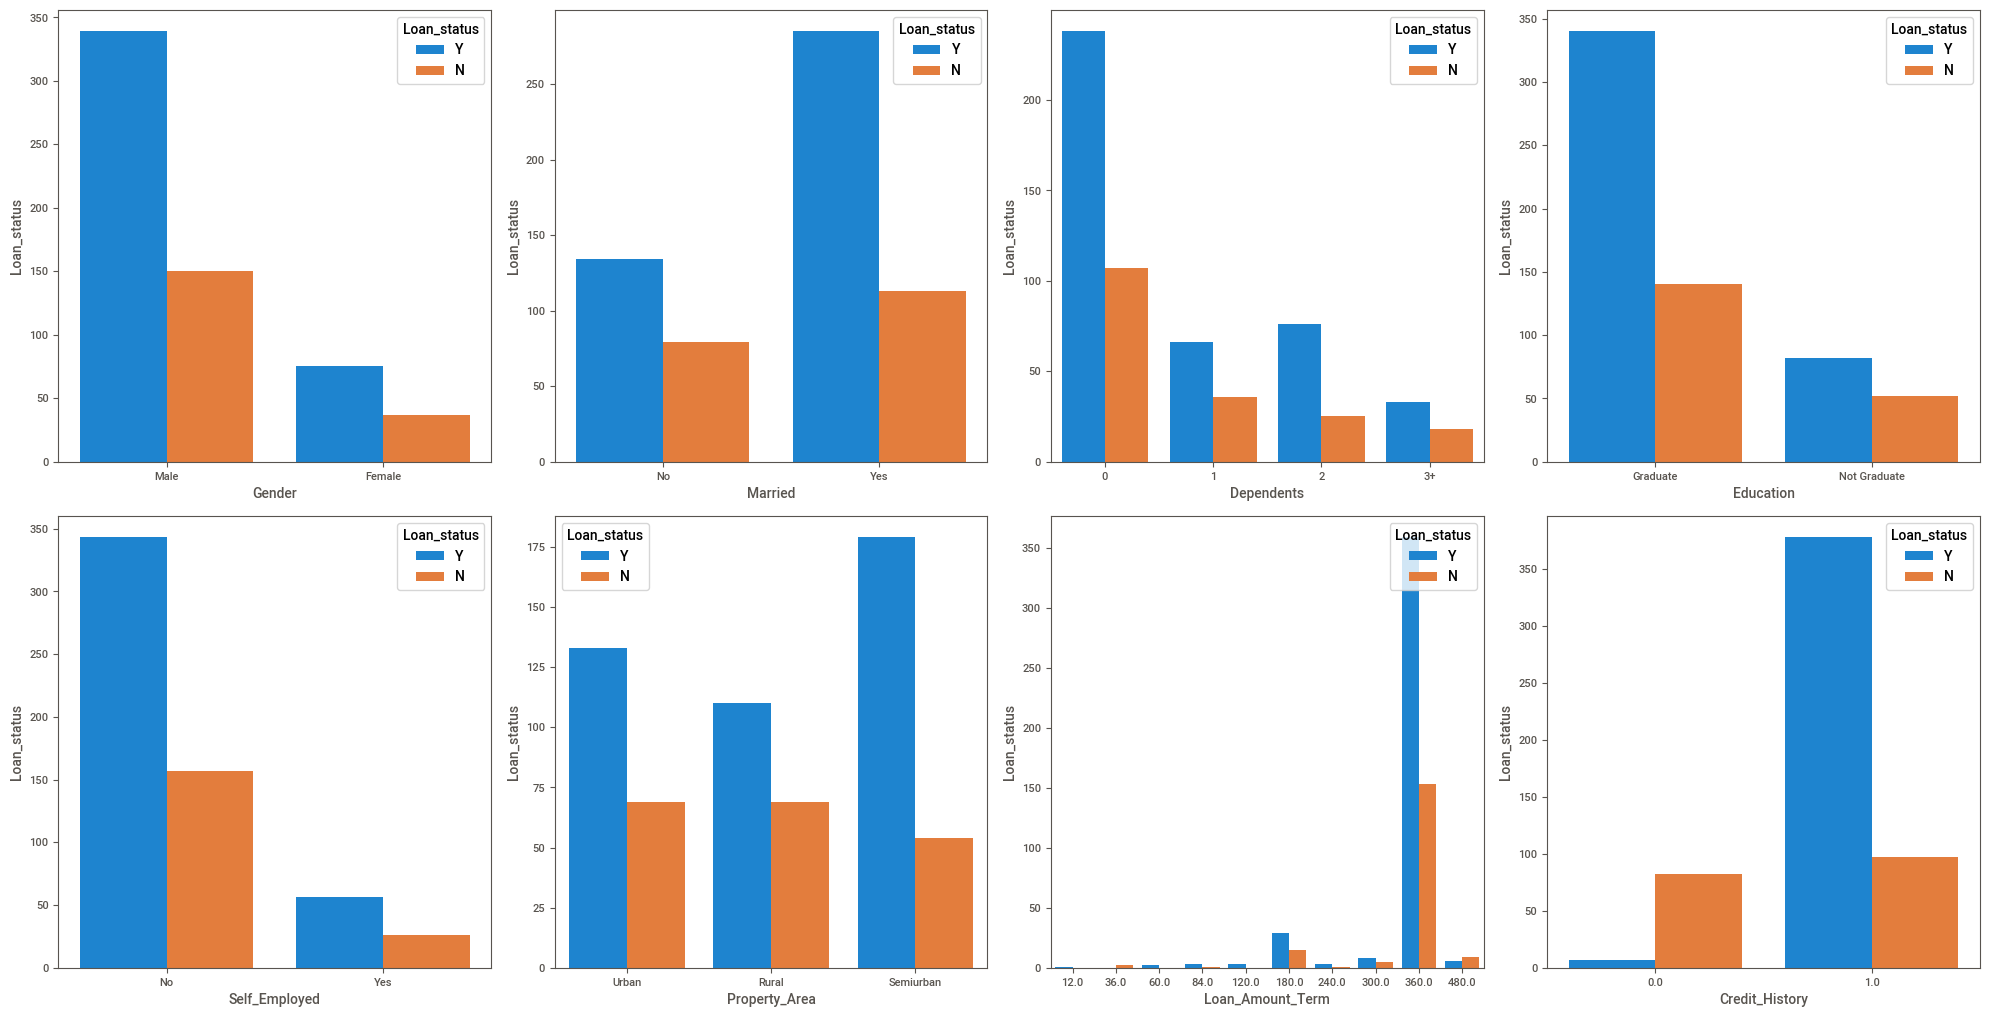

In [16]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data1:
        if plotnumber<=16:
            ax=plt.subplot(4,4,plotnumber)
            sns.countplot(x=data1[column],hue=data['Loan_status'])
            plt.xlabel(column,fontsize=10)
            plt.ylabel('Loan_status',fontsize=10)
        plotnumber+=1
plt.tight_layout()

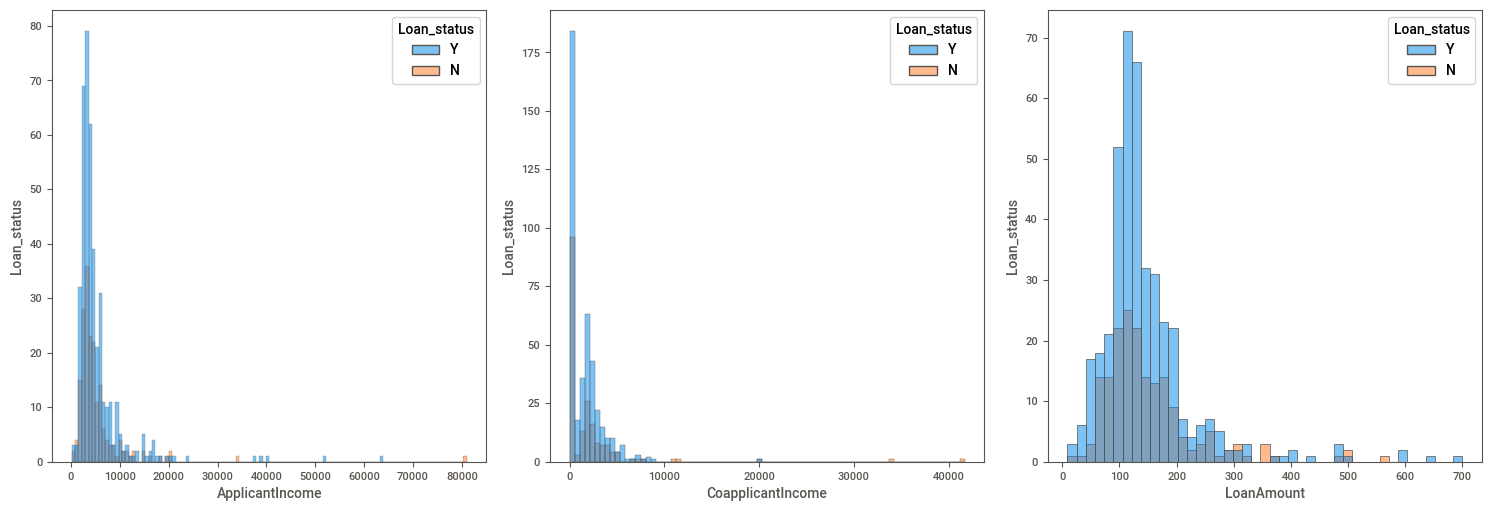

In [17]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in data2:
        if plotnumber<=16:
            ax=plt.subplot(4,4,plotnumber)
            sns.histplot(x=data2[column],hue=data['Loan_status'])
            plt.xlabel(column,fontsize=10)
            plt.ylabel('Loan_status',fontsize=10)
        plotnumber+=1
plt.tight_layout()

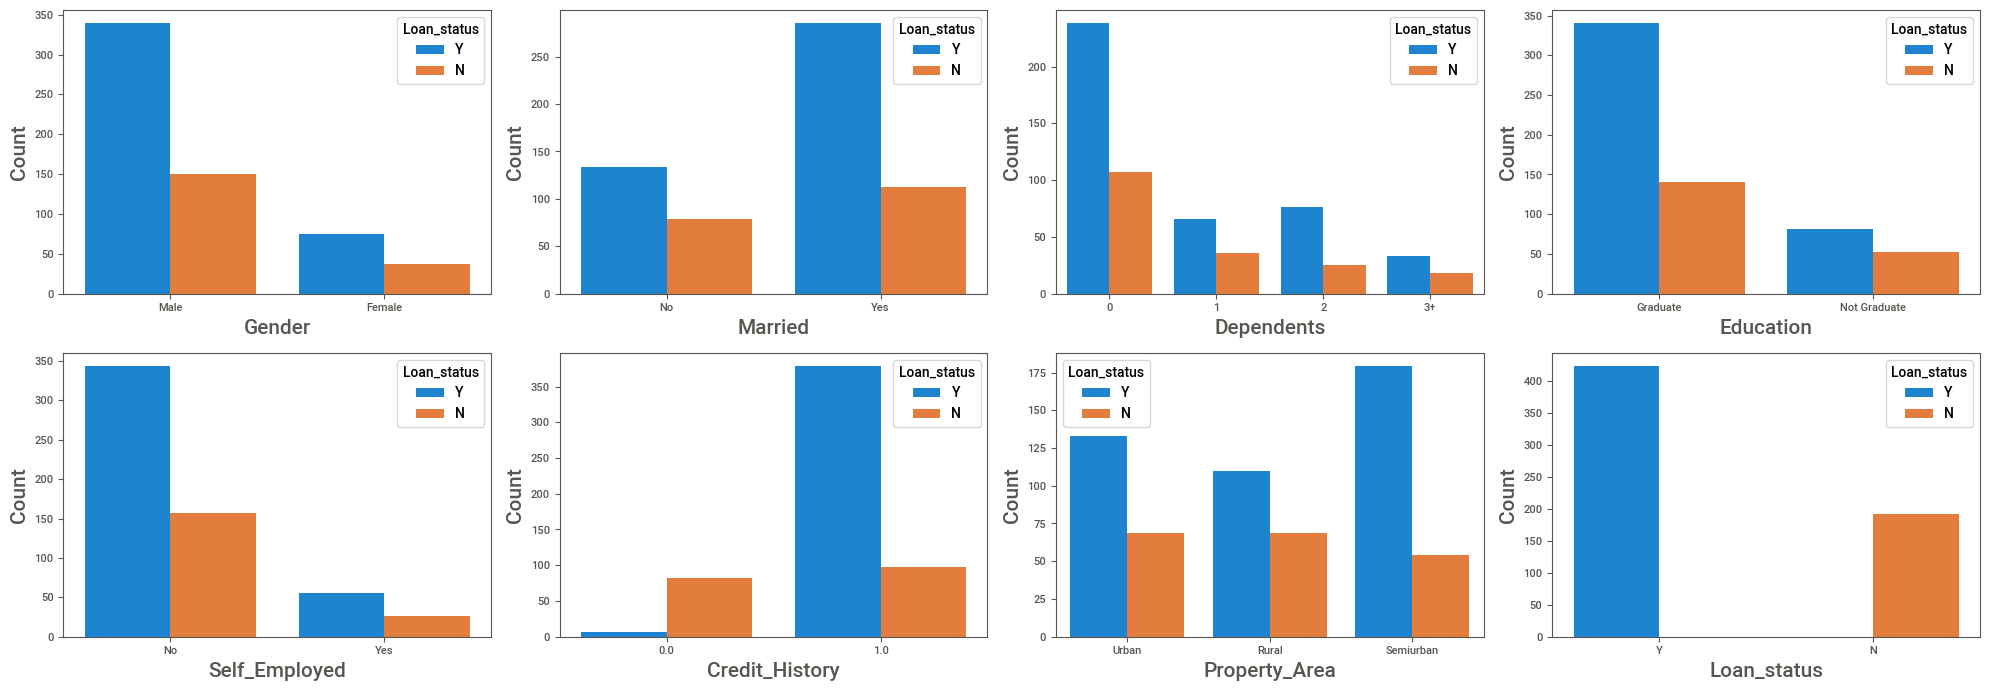

In [18]:
plt.figure(figsize=(20, 10), facecolor='white')
plotnumber = 1

columns_to_exclude = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for column in data.columns:
    if column not in columns_to_exclude:
        if plotnumber <= 12:
            ax = plt.subplot(3, 4, plotnumber)  
            sns.countplot(data[column], hue=data['Loan_status'])
            plt.xlabel(column, fontsize=15)
            plt.ylabel('Count',fontsize=15)
            plotnumber += 1

plt.tight_layout()
plt.show()


TypeError: Neither the `x` nor `y` variable appears to be numeric.

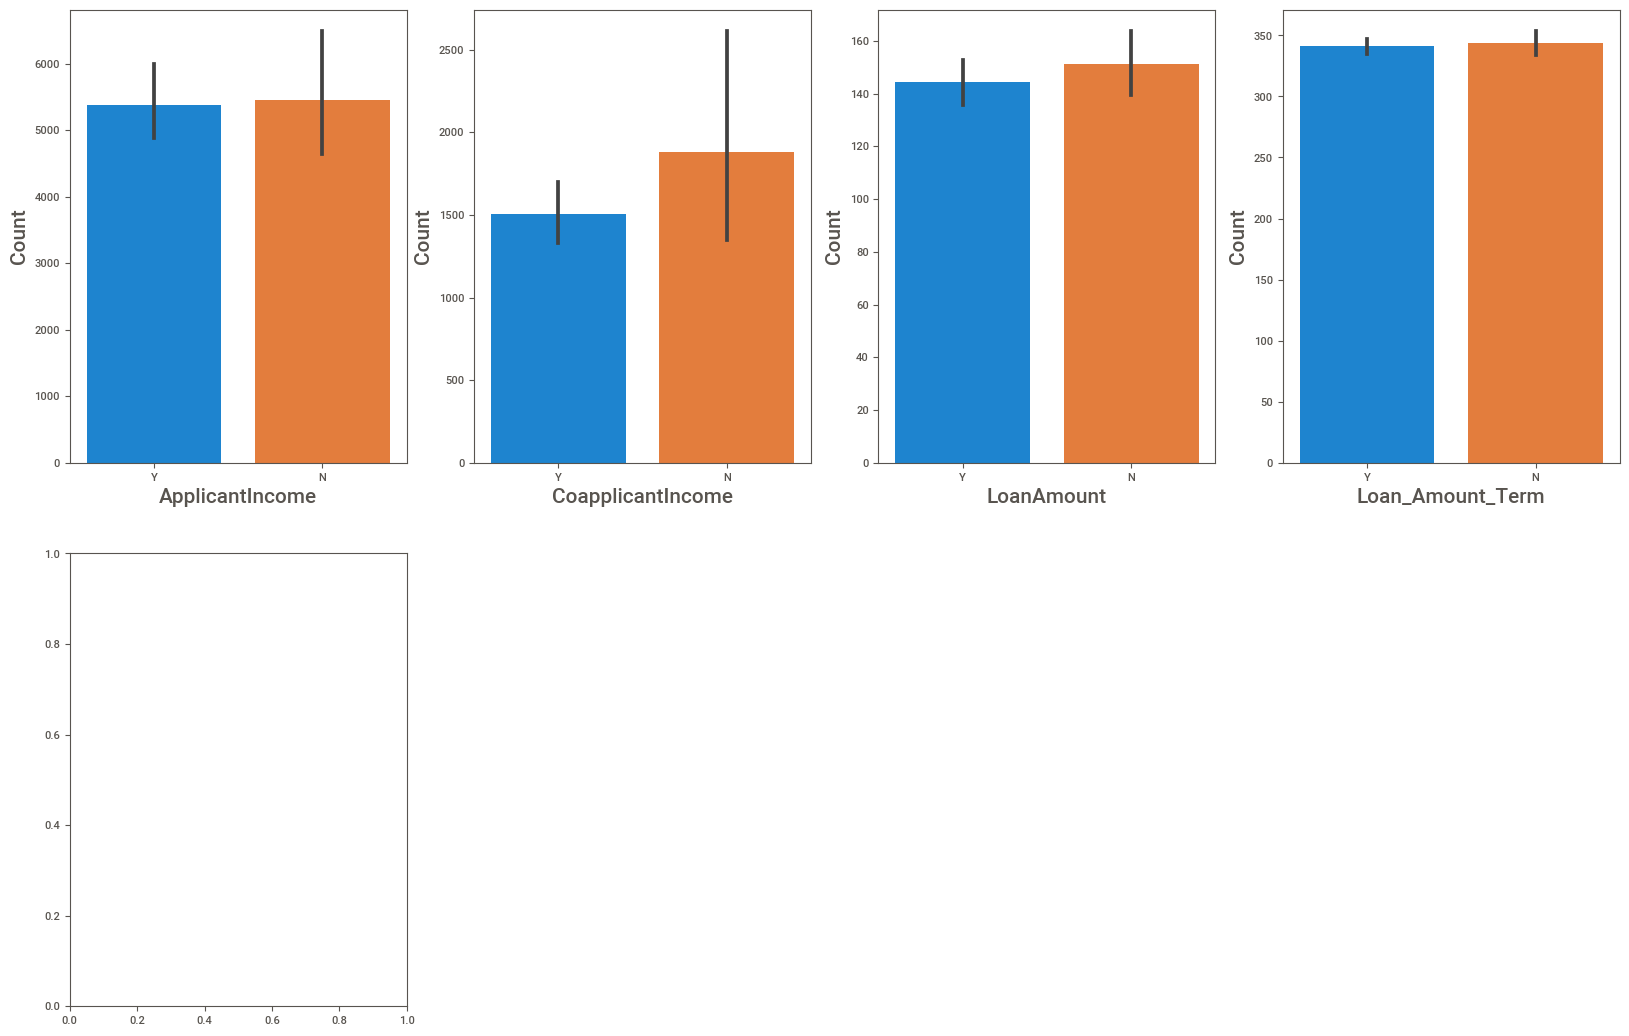

In [19]:
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

columns_to_exclude = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for column in data.columns:
    if column not in columns_to_exclude:
        if plotnumber <= 12:
            ax = plt.subplot(3,4, plotnumber)  
            sns.barplot(x=data['Loan_status'], y=data[column])
            plt.xlabel(column, fontsize=15)
            plt.ylabel('Count', fontsize=15)
            plotnumber += 1

plt.tight_layout()
plt.show()

### Data preprocessing

In [20]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_status           0
dtype: int64

In [21]:
data.loc[data['Gender'].isnull(),'Gender'] = 'Male'

In [22]:
data.loc[data['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [23]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
data.loc[data['Married'].isnull(),'Married'] = 'Yes'

In [25]:
data.loc[data['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [26]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
data.loc[data['Dependents'].isnull(),'Dependents'] = '3+'

In [28]:
data.loc[data['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [29]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
data.loc[data['Self_Employed'].isnull(),'Self_Employed'] = 'Yes'

In [31]:
data.loc[data['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Yes,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,3+,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

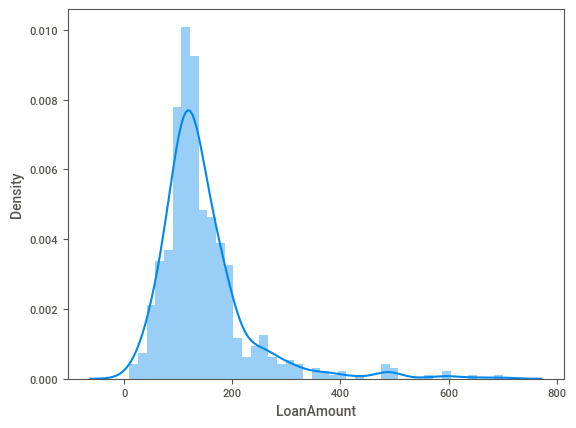

In [32]:
sns.distplot(data.LoanAmount)

In [33]:
data.loc[data['LoanAmount'].isnull(),'LoanAmount'] = np.median(data.LoanAmount.dropna())

In [34]:
data.loc[data['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status


In [35]:
data.loc[data['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,Yes,6782,0.0,128.0,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [36]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
data.loc[data['Credit_History'].isnull(),'Credit_History'] = 0.0

In [38]:
data.loc[data['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
19,LP001041,Male,Yes,0,Graduate,Yes,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [39]:
data.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
data.loc[data['Loan_Amount_Term'].isnull(),'Loan_Amount_Term'] = 360.0

In [41]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_status          0
dtype: int64

#### Encoding

In [42]:
data['Gender'] = data.Gender.map({'Female':0,'Male':1})  # manual encoding

In [43]:
data['Married'] = pd.get_dummies(data['Married'],drop_first=True)   #oneheart encoding

In [44]:
data['Education'] = data.Education.map({'Not Graduate':0,'Graduate':1})

In [45]:
data['Self_Employed'] = pd.get_dummies(data['Self_Employed'],drop_first=True)

In [46]:
data1 = pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)

In [47]:
data = pd.concat([data,data1],axis=1)

In [48]:
data.drop('Property_Area',axis=1,inplace=True)

In [49]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Y,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,0
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Y,0,0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Y,0,1


In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
test = encoder.fit_transform(data.Dependents)

In [51]:
data['Dependents'] = pd.DataFrame(test)

In [52]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Y,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,N,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Y,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Y,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Y,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,Y,0,0
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,Y,0,0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,Y,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,Y,0,1


#### Scaling

In [53]:
data3 = data.iloc[:,6:9]
data3

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,128.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data4 = scaler.fit_transform(data3)

In [55]:
data4

array([[ 0.07299082, -0.55448733, -0.21124125],
       [-0.13441195, -0.03873155, -0.21124125],
       [-0.39374734, -0.55448733, -0.94899647],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847],
       [ 0.35706382, -0.55448733,  0.49081614],
       [-0.13441195, -0.55448733, -0.15174486]])

In [56]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = pd.DataFrame(data4)

In [57]:
data['Loan_status'] = data.Loan_status.replace({'Y':1,'N':0})

In [58]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,0.072991,-0.554487,-0.211241,360.0,1.0,1,0,1
1,LP001003,1,1,1,1,0,-0.134412,-0.038732,-0.211241,360.0,1.0,0,0,0
2,LP001005,1,1,0,1,1,-0.393747,-0.554487,-0.948996,360.0,1.0,1,0,1
3,LP001006,1,1,0,0,0,-0.462062,0.251980,-0.306435,360.0,1.0,1,0,1
4,LP001008,1,0,0,1,0,0.097728,-0.554487,-0.056551,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,-0.410130,-0.554487,-0.889500,360.0,1.0,1,0,0
610,LP002979,1,1,3,1,0,-0.212557,-0.554487,-1.258378,180.0,1.0,1,0,0
611,LP002983,1,1,1,1,0,0.437174,-0.472404,1.276168,360.0,1.0,1,0,1
612,LP002984,1,1,2,1,0,0.357064,-0.554487,0.490816,360.0,1.0,1,0,1


### Splitting data

In [59]:
x= data.drop(['Loan_ID','Loan_status'],axis=1)
y=data.Loan_status

In [60]:
y.value_counts()    # data is not balanced

1    422
0    192
Name: Loan_status, dtype: int64

In [61]:
## train,test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=54,test_size=0.2)

In [63]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [64]:
# SMOTE is used to balance the data in the target variable

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)


In [65]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_train_sm))

Counter({1: 334, 0: 157})
Counter({1: 334, 0: 334})


In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)


(491, 12)
(123, 12)
(491,)
(123, 12)


### Model Implementation

In [68]:
# Support vector classifier

from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train_sm,y_train_sm)

SVC()

In [69]:
y_pred = svm.predict(x_test)

In [70]:
### Evaluation

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [71]:
accuracy_score(y_test,y_pred)

0.7073170731707317

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.71      0.99      0.83        88

    accuracy                           0.71       123
   macro avg       0.36      0.49      0.41       123
weighted avg       0.51      0.71      0.59       123



In [73]:
confusion_matrix(y_test,y_pred)

array([[ 0, 35],
       [ 1, 87]], dtype=int64)

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation score:", scores.mean())
print("Std:",scores.std())
# std of <0.05 is good

[0.8150289  0.8150289  0.81395349]
Cross validation score: 0.8146704306134337
Std: 0.0005069547205710685


### Hyperparameter tuning

In [71]:
from sklearn.model_selection import GridSearchCV

## defining parameter range
param_grid = {'C':[0.1,1,2,3,4,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.0001],'random_state':(list(range(1,20)))}

model = SVC()
grid = GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)

# fitting the model for fit search
grid.fit(x,y)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [72]:
print(grid.best_params_)

{'C': 5, 'gamma': 0.01, 'random_state': 1}


In [75]:
model = SVC(C=5,gamma=0.01,random_state=1)

In [76]:
model.fit(x_train_sm,y_train_sm)

SVC(C=5, gamma=0.01, random_state=1)

In [80]:
y_prediction = model.predict(x_test)

In [81]:
accuracy_score(y_test,y_prediction)

0.8211382113821138

In [82]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        35
           1       0.86      0.90      0.88        88

    accuracy                           0.82       123
   macro avg       0.78      0.76      0.77       123
weighted avg       0.82      0.82      0.82       123



In [83]:
confusion_matrix(y_test,y_prediction)

array([[22, 13],
       [ 9, 79]], dtype=int64)